# Exploratory data analysis

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Data set loading

In [28]:
df_wines= pd.read_csv('data/wines_clean.csv')

In [29]:
# Data exploration
print(df_wines.head()) #Show the first rows of the DataFrame to understand the structure

    country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87   25.0   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province                                              title  \
0  Sicily & Sardinia                  Nicosia 2013 Vulkà Bianco  (Etna)   
1              Douro      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2             Oregon      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           Michigan  St. Julian 2013 Reserve Late Harvest Riesling ...   
4             Oregon  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend    

### Descriptive statistics for each numerical column

In [31]:
df_wines.describe()

,points,price
count,129907.000000,129907.000000
mean,88.447051,34.651081
std,3.040078,39.673045
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,25.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


* The total number of points is 129907.

* The average score is approximately 88.45. The standard deviation is 3.04, which indicates the dispersion of the scores around the mean. The minimum score is 80 and the maximum is 100.

* As for the price, it seems like the average price is $35. The cheapest wine costs 4 dollars. The most expensive wine costs $3,300 from France.

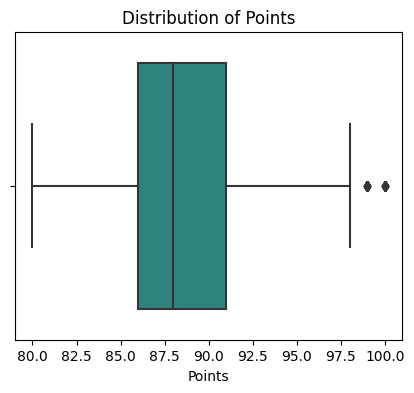

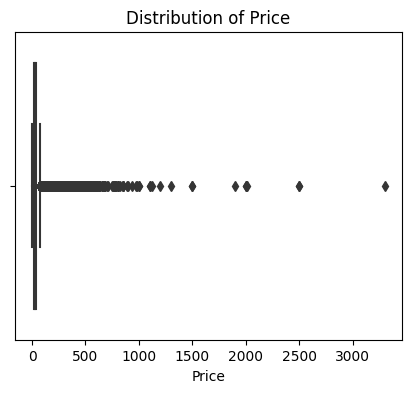

In [32]:
# Create boxplot for 'points'
plt.figure(figsize=(5, 4))
sns.boxplot(x='points', data=df_wines, palette='viridis')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.show()

# Create boxplot for 'price'
plt.figure(figsize=(5, 4))
sns.boxplot(x='price', data=df_wines, palette='viridis')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

* Points: data distribution is skewed to the left.
* Price: most of the data are very close to the same center position and presence of few atypical points.

## Variety

In [33]:
# Sum of reviews per variety (Top 25)
df_wines["variety"].value_counts().head(25)

variety
Pinot Noir                    13269
Chardonnay                    11750
Cabernet Sauvignon             9470
Red Blend                      8935
Bordeaux-style Red Blend       6915
Riesling                       5188
Sauvignon Blanc                4963
Syrah                          4142
Rosé                           3563
Merlot                         3101
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2354
Sparkling Blend                2153
Tempranillo                    1809
Rhône-style Red Blend          1470
Pinot Gris                     1452
Champagne Blend                1396
Cabernet Franc                 1352
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Name: count, dtype: int64

Pinot Noir was the most frequently reviewed followed by Chardonnay and Cabernet Sauvignon.

In [34]:
# Number of unique wine varieties in the reviews:
unique_wines = df_wines["variety"].unique()
print("Unique wine varieties in the reviews: \n{}".format(len(unique_wines)))

Unique wine varieties in the reviews: 
701


## Country and reviews

In [35]:
# Total amount of Countries featured in the reviews:
total_countries = df_wines["country"].unique()
print("Number of Countries reviewed: {}".format(len(total_countries)))

Number of Countries reviewed: 43


#### Top 20 reviewers for countries

In [36]:
df_country_count = df_wines.groupby('country').apply(lambda df: len(df))
df_country_count = df_country_count.reset_index()
df_country_count.columns = ['country', 'num_of_reviews']
df_country_count = df_country_count.sort_values(by=['num_of_reviews'], ascending=False)
df_country_count = df_country_count.head(20)

print(df_country_count)

         country  num_of_reviews
40            US           54504
15        France           22093
22         Italy           19540
37         Spain            6645
31      Portugal            5691
8          Chile            4471
0      Argentina            3800
3        Austria            3345
2      Australia            2329
17       Germany            2165
29   New Zealand            1419
36  South Africa            1401
21        Israel             505
18        Greece             466
7         Canada             257
19       Hungary             146
6       Bulgaria             141
32       Romania             120
42       Uruguay             109
39        Turkey              90


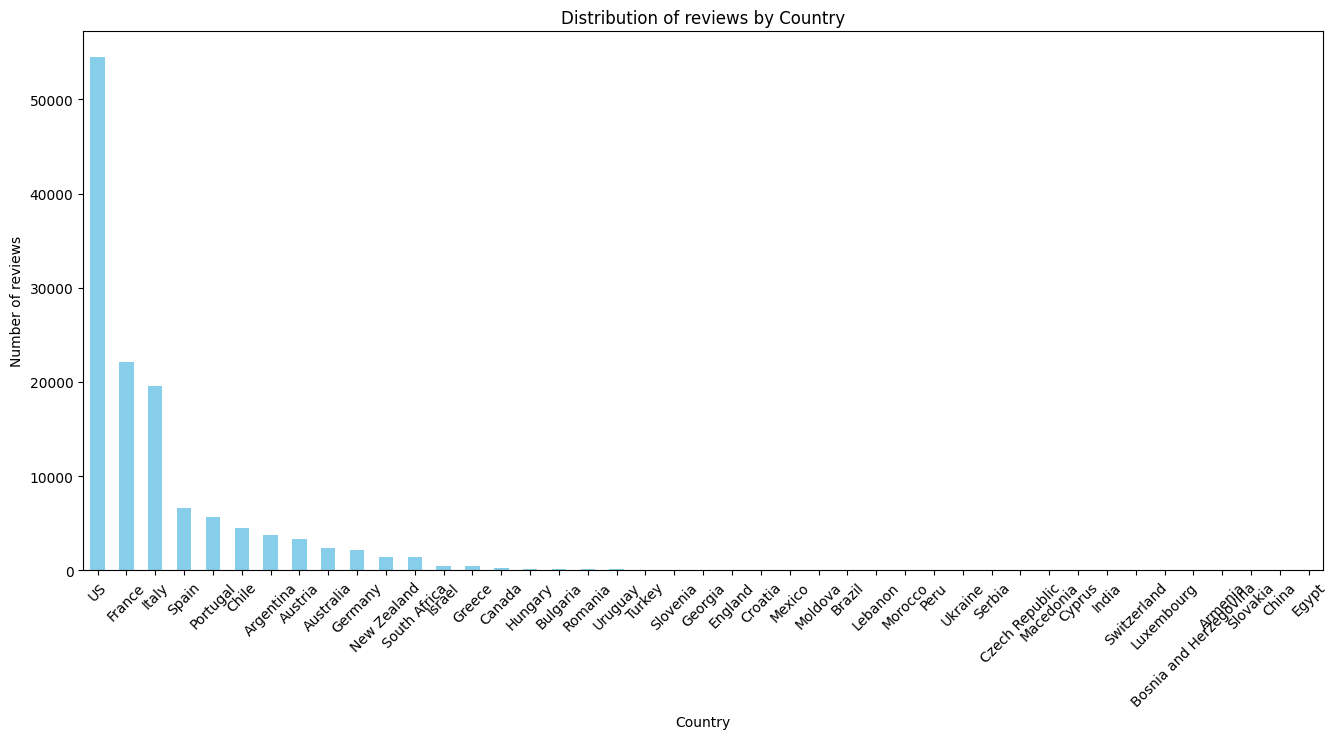

In [37]:
# Group the data by country and count the number of wines in each country
country_counts = df_wines['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 7))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of reviews by Country')
plt.xlabel('Country')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* The majority of wine reviewed is from the US, France, Italy, Spain and Portugal. And the first 12 countries has much more reviews than others. 

In [38]:
# The wines with the best reviews from Argentina
argentina_top_ten = df_wines[df_wines['country'].str.match('Argentina')]
argentina_top_ten.sort_values("points", ascending=False).head(10)

,country,description,points,price,province,title,variety,winery
82715,Argentina,"If the color doesn't tell the full story, the ...",97,120.0,Mendoza Province,Bodega Catena Zapata 2006 Nicasia Vineyard Mal...,Malbec,Bodega Catena Zapata
109787,Argentina,Just when you think Alta Vista has gotten ever...,96,48.0,Mendoza Province,Alta Vista 2013 Single Vineyard Temis Malbec (...,Malbec,Alta Vista
109177,Argentina,This wine takes you on a trip to an outer wine...,96,50.0,Mendoza Province,Riglos 2009 Gran Corte Las Divas Vineyard Red ...,Bordeaux-style Red Blend,Riglos
95025,Argentina,"Inky berry and smoky, minerally aromas of char...",95,48.0,Mendoza Province,Alta Vista 2012 Single Vineyard Temis Malbec (...,Malbec,Alta Vista
78267,Argentina,While the nose on this muscular Malbec is lush...,95,100.0,Mendoza Province,Terrazas de Los Andes 2009 Single Parcel Los C...,Malbec,Terrazas de Los Andes
38966,Argentina,This is a supreme small-lot Argentine wine fro...,95,62.0,Mendoza Province,Finca Perdriel 2007 Vineyard Selection Red (Me...,Bordeaux-style Red Blend,Finca Perdriel
78268,Argentina,"Take note, this could be the best wine Colomé ...",95,90.0,Other,Colomé 2010 Reserva Malbec (Salta),Malbec,Colomé
8866,Argentina,If you love massive Argentine reds with purity...,95,74.0,Mendoza Province,Pascual Toso 2014 Finca Pedregal Single Vineya...,Cabernet Sauvignon-Malbec,Pascual Toso
126177,Argentina,A wine that makes you take notice. The bouquet...,95,50.0,Mendoza Province,Vistalba 2007 Corte A Red (Mendoza),Red Blend,Vistalba
121968,Argentina,"Price aside, this is absolutely wonderful Malb...",95,225.0,Mendoza Province,Viña Cobos 2010 Cobos Marchiori Vineyard Malbe...,Malbec,Viña Cobos


The winery with the best score in Argentina is Catena Zatapa with a score of 97.

## Points

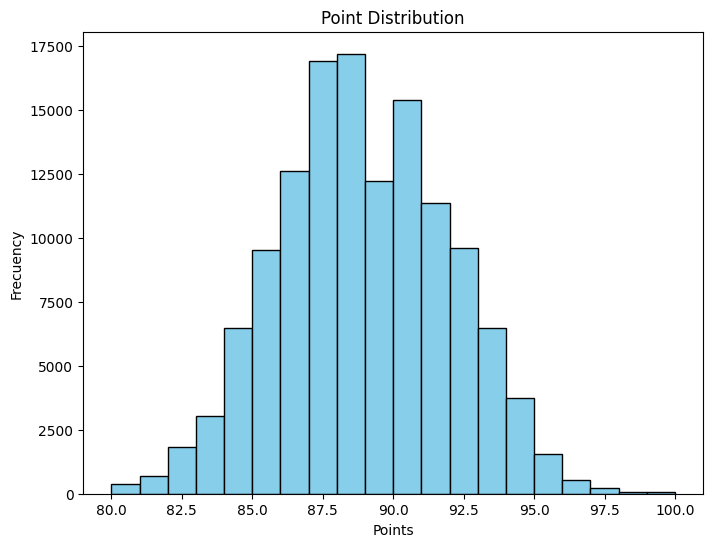

In [39]:
#Histogram
plt.figure(figsize=(8, 6))
plt.hist(df_wines['points'], bins=20, color='skyblue', edgecolor='black')
plt.title('Point Distribution')
plt.xlabel('Points')
plt.ylabel('Frecuency')
plt.show()

<Axes: xlabel='points', ylabel='Density'>

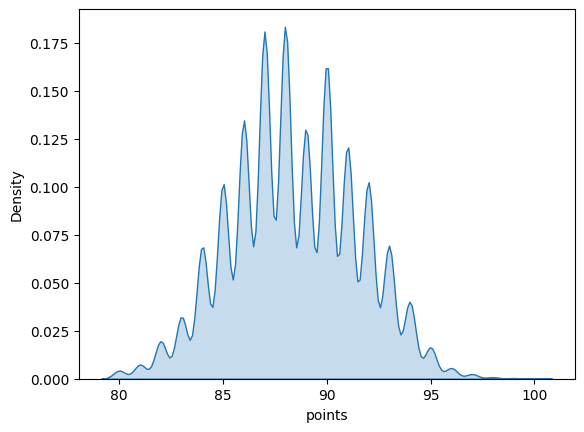

In [40]:
sns.kdeplot(data=df_wines['points'], shade=True)

Points feature range in dataset is actually between 80 and 100. So, we can conclude that only best rated wines are in input dataset. Distribution is aproximately bell curved, with some missing points in between.

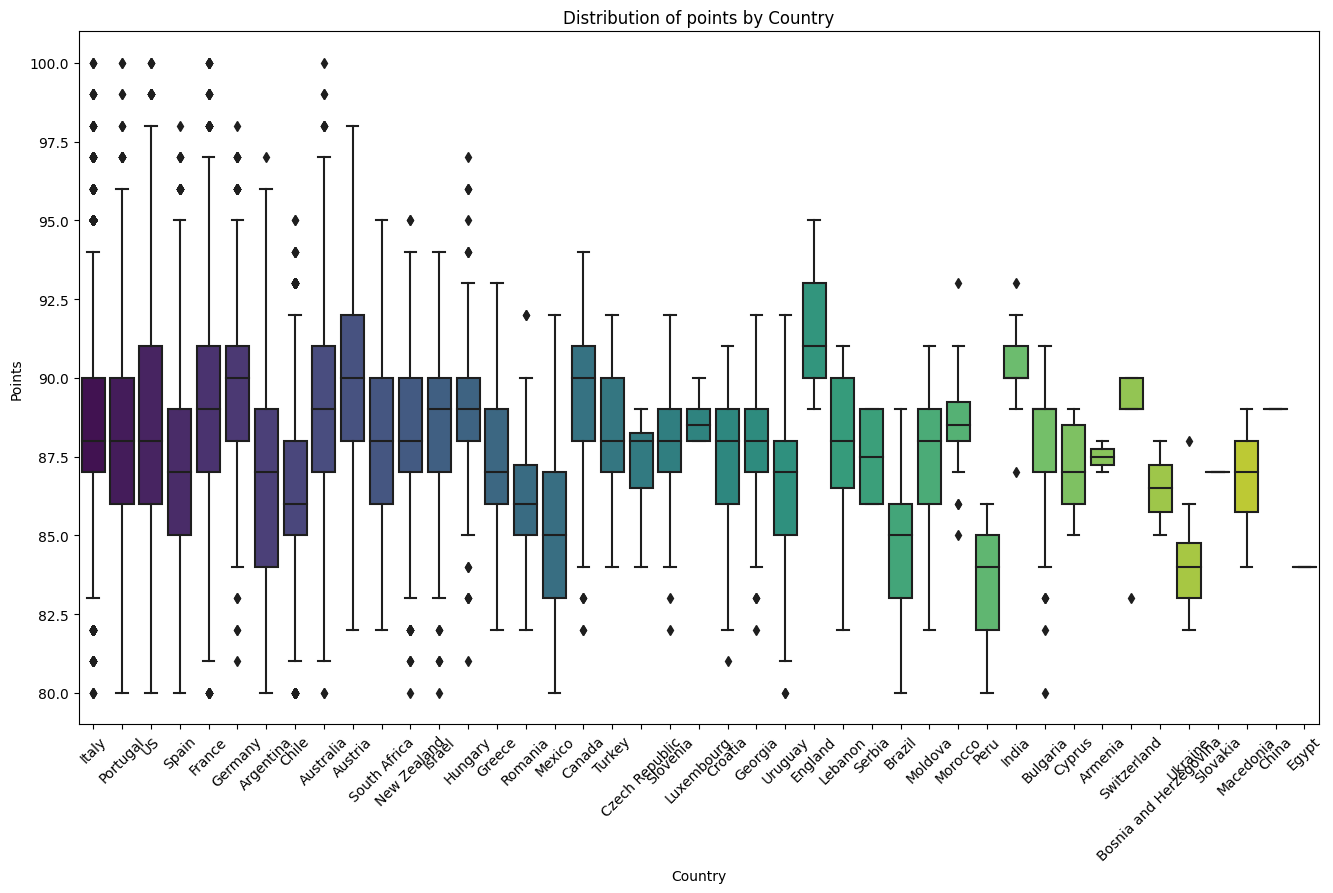

In [59]:
plt.figure(figsize=(16, 9))
sns.boxplot(x='country', y='points', data=df_wines, palette='viridis')
plt.title('Distribution of points by Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

## Wines with perfect score

In [41]:
# Create a new dataframe for the perfect scores records:
perfect_scores_df = df_wines[df_wines['points'] == 100]
perfect_scores_df

,country,description,points,price,province,title,variety,winery
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7332,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36512,France,This is a fabulous wine from the greatest Cham...,100,259.0,Champagne,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39268,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42179,Portugal,This is the latest release of what has long be...,100,450.0,Douro,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45758,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45775,US,Tasted in a flight of great and famous Napa wi...,100,200.0,California,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58322,France,"This is a magnificently solid wine, initially ...",100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89685,France,This latest incarnation of the famous brand is...,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89686,France,This new release from a great vintage for Char...,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


Most of the wines with the best reviews come from France, Italy, Australia, Portugal and US.

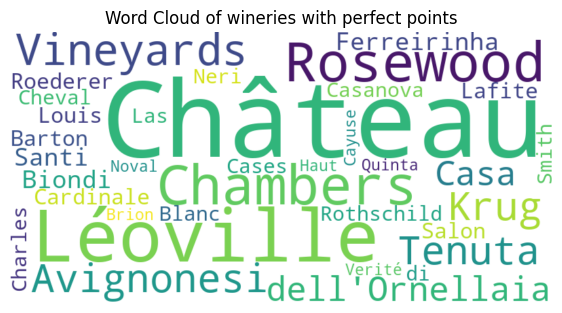

In [42]:
# Create a string with all the words in the 'winery' column
text = ' '.join(perfect_scores_df['winery'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Show visualization
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes
plt.title('Word Cloud of wineries with perfect points')
plt.show()

In [43]:
# Count how many perfect scores per country:
perfect_scores_df["country"].value_counts()

country
France       8
Italy        4
US           4
Portugal     2
Australia    1
Name: count, dtype: int64

## Wines with lowest score

In [44]:
# Ordenar el DataFrame por la columna 'points' de forma ascendente
df_lowest_points = df_wines.sort_values(by='points', ascending=True)

# Seleccionar los primeros registros (los vinos con la puntuación más baja)
lowest_points_wines = df_lowest_points.head(10)  # Por ejemplo, seleccionamos los primeros 10 vinos

# Imprimir los vinos con la puntuación más baja
print(lowest_points_wines[['title', 'country', 'points']])

                                                    title    country  points
28555   French Hill 2006 Grand Reserve Petit Verdot (C...         US      80
97140     Sawyer 2007 Estate Sauvignon Blanc (Rutherford)         US      80
117084  Espuela del Gaucho 2012 Gaucho Spur Cabernet S...  Argentina      80
36177              Pessimist 2012 Chardonnay (California)         US      80
36178            Beach Kite 2012 Moscato (Central Valley)      Chile      80
128202  Reyter 2009 Finca La Martina Chardonnay (Mendoza)  Argentina      80
128201  Chaddsford 2007 Proprietor's Reserve White (Pe...         US      80
128200         BookCliff NV Lucky Twenty White (Colorado)         US      80
128199               Montelle 2008 Chambourcin (Missouri)         US      80
128198  Bloomfield 2008 Devil's Daughter White (Contra...         US      80


## Winery

#### Wineries with more reviews

In [74]:
# Group by winery and count the number of reviews
df_winery_count = df_wines.groupby(['winery', 'country']).size().reset_index(name='num_of_reviews')
# Sort by number of reviews in descending order
df_winery_count = df_winery_count.sort_values(by='num_of_reviews', ascending=False)
# Select the 10 wineries with the most reviews
df_winery_count_top10 = df_winery_count.head(10)

print(df_winery_count_top10)

                      winery   country  num_of_reviews
16691     Wines & Winemakers  Portugal             222
15184             Testarossa        US             218
5460              DFJ Vinhos  Portugal             215
16643        Williams Selyem        US             211
10328           Louis Latour    France             199
7924         Georges Duboeuf    France             196
2889   Chateau Ste. Michelle        US             194
5084           Concha y Toro     Chile             164
5057          Columbia Crest        US             159
9326         Kendall-Jackson        US             130


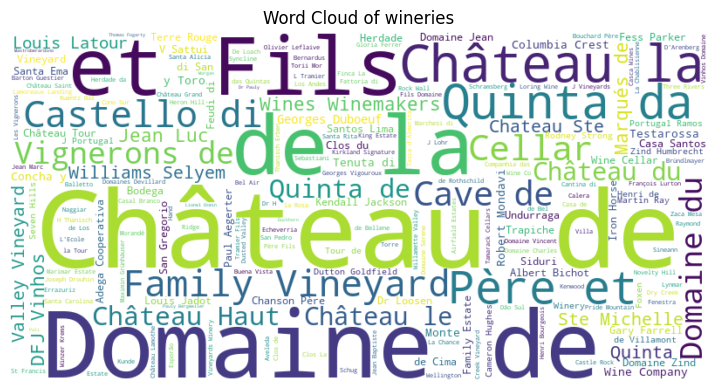

In [46]:
# Concatenate all winery names into a single string
text = ' '.join(df_wines['winery'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Show visualization
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.title('Word Cloud of wineries')
plt.show()

## Price

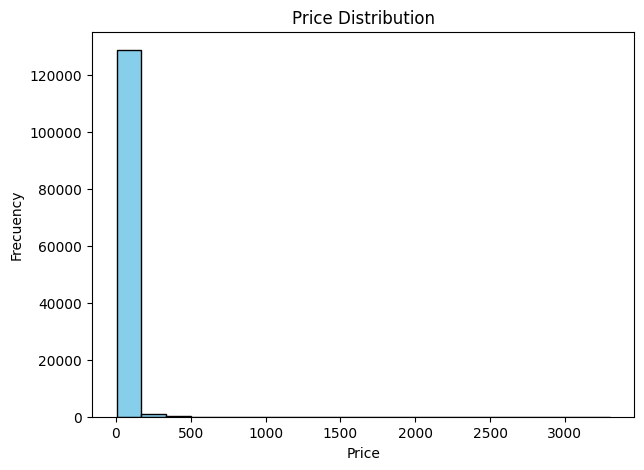

In [54]:
plt.figure(figsize=(7, 5))
plt.hist(df_wines['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.show()

The frequency of the wines does not reach almost $300.

In [47]:
# The most expensive wine
max_price =df_wines['price'].max()
print("The most expensive wine in all the reviews cost ${:.2f}".format(max_price))

The most expensive wine in all the reviews cost $3300.00


In [48]:
# reviews_df.groupby("Variety").Price.max()
df_wines[df_wines['price'] == 3300]

,country,description,points,price,province,title,variety,winery
80253,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [49]:
# Analyze the range in price for perfect score wines by country:
perfect_scores_df.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Australia,1,350.0,350.0
France,8,150.0,1500.0
Italy,4,210.0,550.0
Portugal,2,450.0,650.0
US,4,80.0,450.0


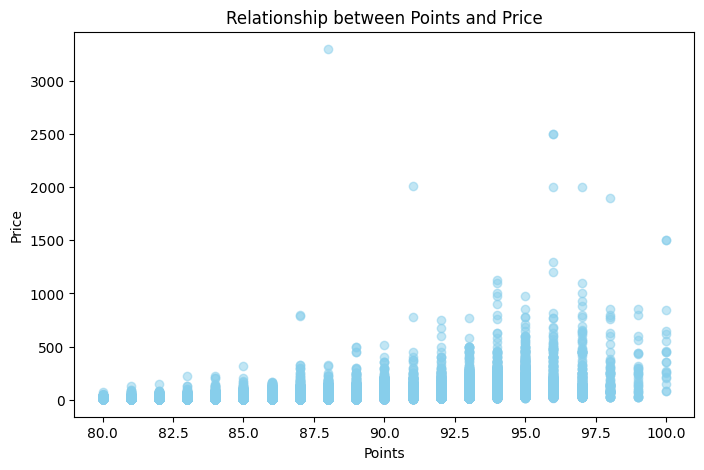

In [63]:
plt.figure(figsize=(8, 5))
plt.scatter(df_wines['points'], df_wines['price'], color='skyblue', alpha=0.5)
plt.title('Relationship between Points and Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price', ylabel='points'>

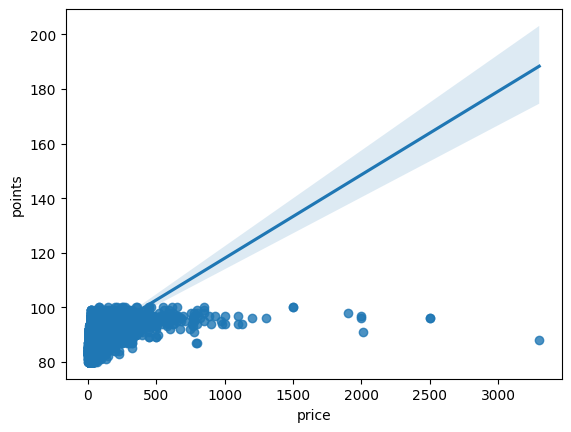

In [50]:
sns.regplot(x=df_wines['price'], y=df_wines['points'])

The linear correlation between price and points has no relationship. We see that both the lower and higher priced wines could have same points. Also worth to mention points-price function is not linear. There is a lot of variance (spread) in data.